In [24]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [6]:
DATASET_COLUMNS = ["Name","servings","dairy_product","salt","potato","vegetables","sugar","chicken","oil","beef","fruits","egg","mutton","rice","carbs","fish","dried_fish","healthy"
]
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
df.head()

,Name,servings,dairy_product,salt,potato,vegetables,sugar,chicken,oil,beef,fruits,egg,mutton,rice,carbs,fish,dried_fish,healthy
0,Alu Bharta,4,0.0,4.0,250,0.0,0.0,0.0,8.0,0.0,0.0,0,0,0,0,0,0,1
1,Alu Bharta,2,0.0,2.0,150,0.0,0.0,0.0,5.0,0.0,0.0,0,0,0,0,0,0,1
2,Alu Bharta,2,5.0,2.0,150,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1
3,Alu Bharta,2,0.0,4.0,250,0.0,0.0,0.0,5.0,0.0,0.0,0,0,0,0,0,0,0
4,Alu Bharta,2,5.0,4.0,250,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0


In [7]:
df.drop(["Name"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   servings       315 non-null    int64  
 1   dairy_product  315 non-null    float64
 2   salt           315 non-null    float64
 3   potato         315 non-null    int64  
 4   vegetables     313 non-null    float64
 5   sugar          315 non-null    float64
 6   chicken        314 non-null    float64
 7   oil            315 non-null    float64
 8   beef           314 non-null    float64
 9   fruits         315 non-null    float64
 10  egg            315 non-null    int64  
 11  mutton         315 non-null    int64  
 12  rice           315 non-null    int64  
 13  carbs          315 non-null    int64  
 14  fish           315 non-null    int64  
 15  dried_fish     315 non-null    int64  
 16  healthy        315 non-null    int64  
dtypes: float64(8), int64(9)
memory usage: 42.0 KB


In [8]:
df.fillna(0, inplace=True)

In [9]:
df.isnull().values.any()

False

In [10]:
# Everything except target variable
X = df.drop("healthy", axis=1)

# Target variable
y = df.healthy.values

In [11]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [12]:
X_test.head()

,servings,dairy_product,salt,potato,vegetables,sugar,chicken,oil,beef,fruits,egg,mutton,rice,carbs,fish,dried_fish
206,2,250.0,0.0,0,0.0,0.0,0.0,5.0,0.0,0.0,0,0,0,250,0,0
33,4,0.0,8.0,0,0.0,0.0,1000.0,100.0,0.0,0.0,0,0,0,0,0,0
163,2,0.0,3.0,0,45.0,0.0,0.0,0.0,0.0,50.0,0,0,0,0,0,0
78,4,405.0,2.0,0,0.0,125.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0
93,6,0.0,2.5,0,0.0,0.0,0.0,15.0,0.0,0.0,6,0,0,0,0,0


In [13]:
y_test, len(y_test)

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0],
       dtype=int64),
 63)

In [14]:
X_train.head()

,servings,dairy_product,salt,potato,vegetables,sugar,chicken,oil,beef,fruits,egg,mutton,rice,carbs,fish,dried_fish
221,4,250.0,2.1,0,200.0,2.1,0.0,8.4,0.0,0.0,0,0,0,0,0,0
132,1,0.0,4.0,0,0.0,0.0,0.0,100.0,0.0,0.0,0,0,0,65,0,0
155,1,100.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,50,0,0
94,5,0.0,4.5,0,0.0,0.0,0.0,50.0,0.0,0.0,0,0,0,0,0,0
245,1,530.0,0.0,0,0.0,25.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [15]:
y_train, len(y_train)

(array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64),
 252)

In [16]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC(),
          "Gaussian NB": GaussianNB(),
          "Multinomial NB": MultinomialNB(),
          "SGD Classifier": SGDClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "Gradient Boosting Classifier": GradientBoostingClassifier()}

from sklearn.exceptions import ConvergenceWarning
import warnings

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Suppress convergence warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            # Fit the model to the data
            model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [17]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.6984126984126984,
 'Logistic Regression': 0.6984126984126984,
 'Random Forest': 0.7619047619047619,
 'SVC': 0.6984126984126984,
 'Gaussian NB': 0.6825396825396826,
 'Multinomial NB': 0.6031746031746031,
 'SGD Classifier': 0.5396825396825397,
 'Decision Tree Classifier': 0.7619047619047619,
 'Gradient Boosting Classifier': 0.7777777777777778}

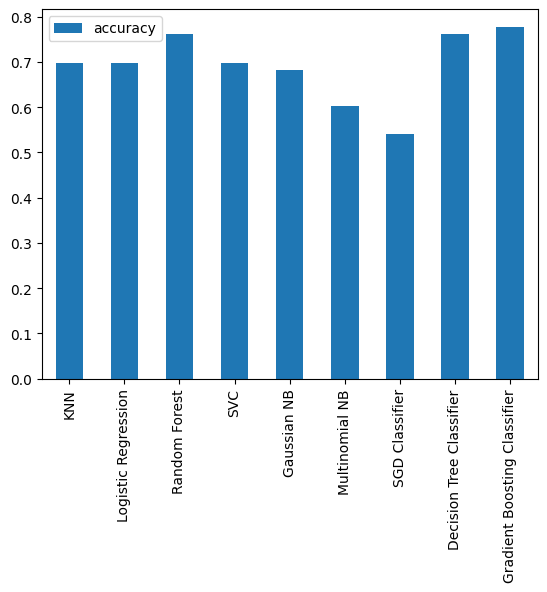

In [18]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [25]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC(),
          "Gaussian NB": GaussianNB(),
          "Multinomial NB": MultinomialNB(),
          "SGD Classifier": SGDClassifier(),
          "Decision Tree Classifier": DecisionTreeClassifier(),
          "Gradient Boosting Classifier": GradientBoostingClassifier()}

#Dictionary to store model evaluation metrics
model_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

#Perform cross-validation and calculate metrics for each model
for model_name, model in models.items():
    scoring = ['accuracy', 'precision', 'recall', 'f1']

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)

        scores = cross_validate(model, X, y, scoring=scoring, cv=5)  # 5-fold cross-validation

        accuracy = scores['test_accuracy'].mean()
        precision = scores['test_precision'].mean()
        recall = scores['test_recall'].mean()
        f1 = scores['test_f1'].mean()

    # Store the metrics in the dictionary
    model_metrics['Model'].append(model_name)
    model_metrics['Accuracy'].append(accuracy)
    model_metrics['Precision'].append(precision)
    model_metrics['Recall'].append(recall)
    model_metrics['F1 Score'].append(f1)

#Create a DataFrame from the model metrics dictionary
metrics_df = pd.DataFrame(model_metrics)

#Display the metrics DataFrame
print(metrics_df)

                          Model  Accuracy  Precision    Recall  F1 Score
0                           KNN  0.628571   0.651846  0.806543  0.719610
1           Logistic Regression  0.746032   0.770636  0.822333  0.793406
2                 Random Forest  0.768254   0.782314  0.865576  0.815490
3                           SVC  0.688889   0.711025  0.822760  0.760390
4                   Gaussian NB  0.723810   0.756562  0.796159  0.774359
5                Multinomial NB  0.625397   0.737578  0.570128  0.642533
6                SGD Classifier  0.558730   0.650637  0.521622  0.561895
7      Decision Tree Classifier  0.682540   0.757774  0.704694  0.720286
8  Gradient Boosting Classifier  0.749206   0.773182  0.849644  0.800557


In [26]:
rand_model = RandomForestClassifier()

rand_model.fit(X_train, y_train)

res_rand = rand_model.predict([[4,50,7.5,0,8,0,0,0,450,0,1,0,0,0,0,0]])

print(res_rand)

[1]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [22]:
grad_model = GradientBoostingClassifier()

grad_model.fit(X_train, y_train)

res_grand = grad_model.predict([[4,150,7.5,0,8,0,0,0,450,0,1,0,0,0,0,0]])

print(res_grand)

[0]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
